## Analysis of the Relationship of the Number of Communicable Disease Cases in NYC and Temperature Extremes from 2000-2016
### Fall 2018 'Researching Computing in Earth Sciences' Final Project
#### By: Stephanie Stettz 

In [46]:
# import packages 
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#### Communicable disease cases are reported to the Bureau of Communicable Disease of the NYC Department of Health and Mental Hygiene (DOHMH).  The dataset can be found on the New York City Open Data Website. 

In [3]:
# download and organize disease data
! wget https://data.cityofnewyork.us/api/views/gff2-veif/rows.csv

--2018-11-16 00:19:33--  https://data.cityofnewyork.us/api/views/gff2-veif/rows.csv
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26, 52.206.140.199, 52.206.140.205
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘rows.csv.1’

rows.csv.1              [ <=>                ] 386.94K  --.-KB/s    in 0.09s   

Last-modified header invalid -- time-stamp ignored.
2018-11-16 00:19:34 (3.98 MB/s) - ‘rows.csv.1’ saved [396230]



In [2]:
# save data in pandas array
diseases = pd.read_csv('rows.csv')
diseases.head()
# rename column names to remove spaces for easier access
diseases=diseases.rename(index=str,columns={'Case Count': 'Case_Count',
                                            'Crude Rate per 100,000 Population':'Crude_rate',
                                           'Age-Adjusted Rate per 100,000 Population':'Age_Adj_rate'})
diseases.head()

,Year,Disease,Neighborhood,Case_Count,Crude_rate,Age_Adj_rate
0,2004,Acute hepatitis B,101 Kingsbridge - Riverdale,1,1.1,1.0
1,2004,Acute hepatitis B,102 Northeast Bronx,2,1.1,1.0
2,2004,Acute hepatitis B,103 Fordham - Bronx Park,3,1.2,1.5
3,2004,Acute hepatitis B,104 Pelham - Throgs Neck,9,3.1,3.1
4,2004,Acute hepatitis B,105 Crotona - Tremont,3,1.5,1.6


#### Below is a list of the ten communicable diseases being studied in this analysis:

In [3]:
# create list of all diseases being monitored
disease_names=diseases.groupby('Disease')
list(disease_names.groups.keys())

['Acute hepatitis B',
 'Chronic hepatitis C',
 'Cryptosporidiosis',
 'Legionellosis',
 'Lyme disease',
 'Malaria',
 'Meningococcal disease, invasive',
 'Salmonellosis',
 'Streptococcus pneumoniae, invasive',
 'West Nile disease']

#### From 2000-2016, chronic hepatitis C was the most common communicable disease recorded in New York City (Fig 1a).   2007 had the largest number of recorded communicable disease cases (Fig 1b).

Text(0.5,1,'1b. Number of Cases per Year')

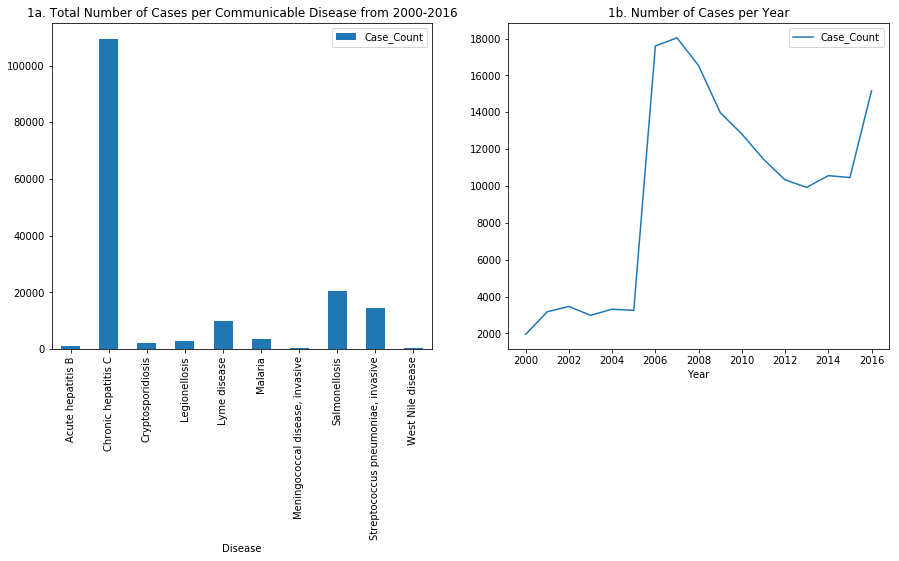

In [21]:
# sort data by disease type 
disease_type = diseases.set_index('Disease')
fig, ax = plt.subplots(ncols=2,figsize=(15,6))
disease_type.groupby('Disease').aggregate({'Case_Count':sum}).plot(ax=ax[0],kind='bar')
ax[0].set_title('1a. Total Number of Cases per Communicable Disease from 2000-2016')
# first plot shows total number of cases over 12 years
diseases.groupby('Year').aggregate({'Case_Count':sum}).plot(ax=ax[1],kind='line')
ax[1].set_title('1b. Number of Cases per Year')
# second plot shows the total number of cases per year

In [29]:
ds = disease_type.groupby(['Year','Disease']).aggregate({'Case_Count':sum})

In [141]:
# import temperature data from IRI library (doesn't work)
# link: 'http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods'
dtemp = xr.open_dataset('http://iridl.ldeo.columbia.edu/SOURCES/.NOAA/.NCEP-NCAR/.CDAS-1/.MONTHLY/.Diagnostic/.surface/.temp/dods',decode_times=False)
dtemp

<xarray.Dataset>
Dimensions:  (T: 838, X: 192, Y: 94)
Coordinates:
  * Y        (Y) float32 88.54196 86.65315 84.75323 82.85076 80.94736 ...
  * X        (X) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * T        (T) float32 -131.5 -130.5 -129.5 -128.5 -127.5 -126.5 -125.5 ...
Data variables:
    temp     (T, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

In [149]:
# add date as coordinate for easier access
dtemp['T'].values
date1='1949-01'
date2='2018-10'
mydates = pd.date_range(date1, date2, freq='M').tolist()
dtemp.coords['date'] = mydates
dtemp.set_index(append=True,)

<xarray.Dataset>
Dimensions:  (T: 838, X: 192, Y: 94, date: 837)
Coordinates:
  * Y        (Y) float32 88.54196 86.65315 84.75323 82.85076 80.94736 ...
  * X        (X) float32 0.0 1.875 3.75 5.625 7.5 9.375 11.25 13.125 15.0 ...
  * T        (T) float32 -131.5 -130.5 -129.5 -128.5 -127.5 -126.5 -125.5 ...
  * date     (date) datetime64[ns] 1949-01-31 1949-02-28 1949-03-31 ...
Data variables:
    temp     (T, Y, X) float32 ...
Attributes:
    Conventions:  IRIDL

ValueError: dimensions or multi-index levels ['date'] do not exist

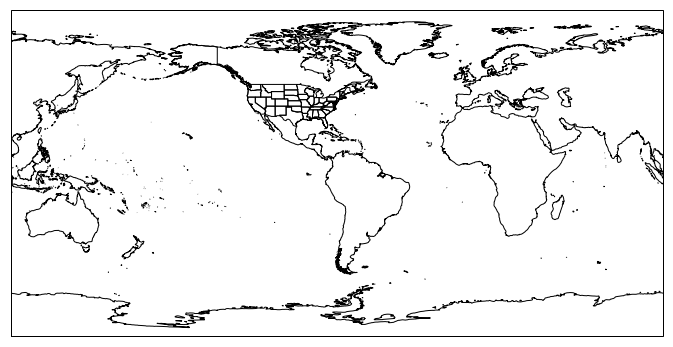

In [146]:
central_lat = 37.5
central_lon = -96
extent = [-80, -70, 40, 47]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])
#extent = [-120, -70, 24, 50.5]
plt.figure(figsize=(15, 6))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=central_lon))
ax.coastlines(resolution='50m')
ax.add_feature(cfeature.STATES)
proj = ccrs.PlateCarree()
# plot temperature data onto map 
dtemp.temp.sel(date='2016-12-31').plot(ax=ax, transform=proj, vmin=260, vmax=280)
ax.set_extent(extent)

#### The figure above shows temperatures over the New York State in 2007. 

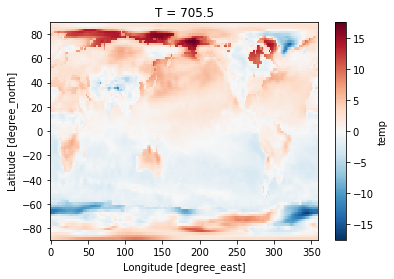

In [133]:
def remove_time_mean(x):
    return x - x.mean(dim='T')

dmean=dtemp.mean(dim='T')
dmean

ds_anom = (dtemp.temp - dmean.temp)
ds_anom.sel(T=705.5).plot()

#(dtemp.temp.sel(T=100.5) - dtemp.temp.sel(T=112.5)).plot()